# Import Libraries

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#  Load and Explore the Dataset

In [76]:
twitts_train = pd.read_csv("twitter_training.csv")
twitts_valid = pd.read_csv("twitter_validation.csv")

In [77]:
column_name=['TweetID','Entity','Sentiment','Tweet_Content']
twitts_train.columns=column_name
twitts_valid.columns=column_name
# Combining 2 dataframes to 1 dataframe
df=pd.concat([twitts_train,twitts_valid],ignore_index=False)
df.head()

,TweetID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [78]:
print("\nDataset summary:")
print(df.info())


Dataset summary:
<class 'pandas.core.frame.DataFrame'>
Index: 75680 entries, 0 to 998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TweetID        75680 non-null  int64 
 1   Entity         75680 non-null  object
 2   Sentiment      75680 non-null  object
 3   Tweet_Content  74994 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB
None


#  Clean and Preprocess the Data

In [79]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
TweetID            0
Entity             0
Sentiment          0
Tweet_Content    686
dtype: int64


In [80]:
df.dropna(inplace=True)

In [81]:
print("\nFirst few rows of the cleaned dataset:")
print(df.head())


First few rows of the cleaned dataset:
   TweetID       Entity Sentiment  \
0     2401  Borderlands  Positive   
1     2401  Borderlands  Positive   
2     2401  Borderlands  Positive   
3     2401  Borderlands  Positive   
4     2401  Borderlands  Positive   

                                       Tweet_Content  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


In [82]:
df.shape

(74994, 4)

In [83]:
df1 = df[['Tweet_Content', 'Sentiment']]

#  Analyze Sentiment Patterns

In [84]:
print("\nUnique sentiment labels:")
print(df1['Sentiment'].unique())


Unique sentiment labels:
['Positive' 'Neutral' 'Negative' 'Irrelevant']


In [85]:
print("\nSentiment distribution:")
print(df1['Sentiment'].value_counts())


Sentiment distribution:
Sentiment
Negative      22624
Positive      20931
Neutral       18393
Irrelevant    13046
Name: count, dtype: int64


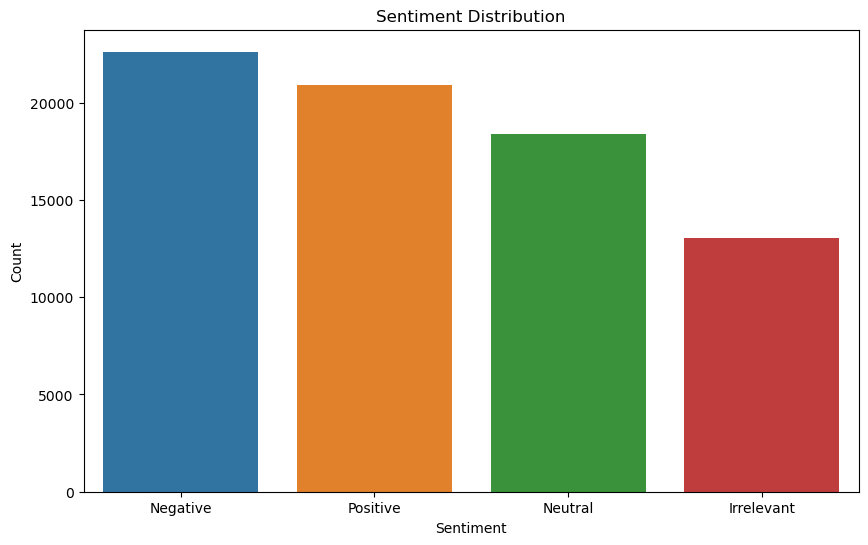

In [86]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df, order=df['Sentiment'].value_counts().index)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

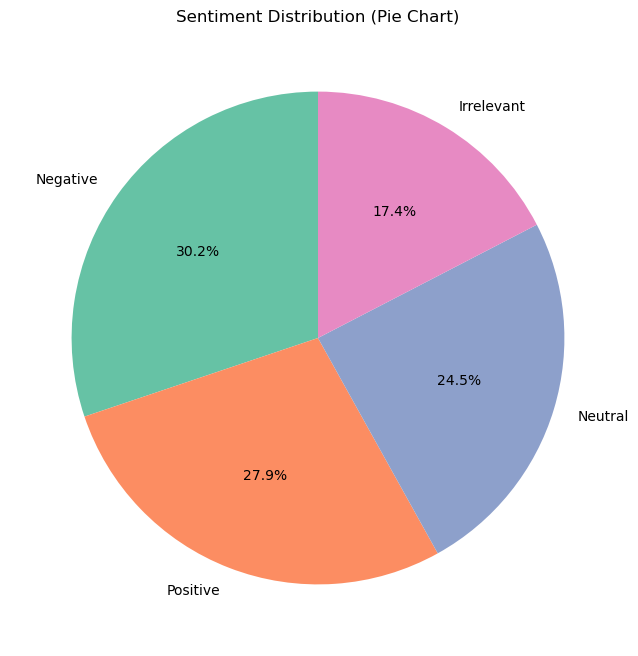

In [87]:
plt.figure(figsize=(8, 8))
df1['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Sentiment Distribution (Pie Chart)')
plt.ylabel('')
plt.show()

<Axes: xlabel='Entity'>

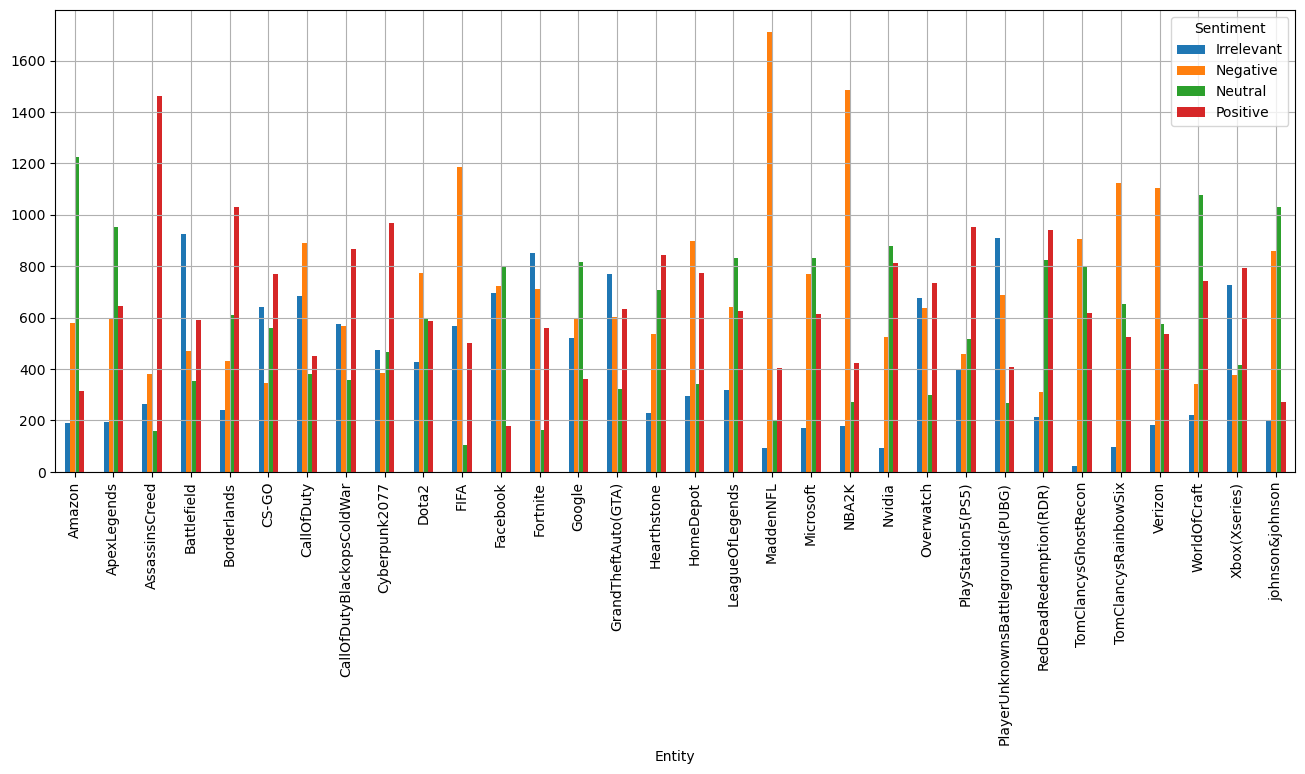

In [88]:
reactions_entities = pd.crosstab(df['Entity'],df['Sentiment'])
reactions_entities.plot(kind='bar', figsize=(16, 6),grid=True)